## Медицинская Сегментация Изображений
https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels

In [12]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm

img_dims = 256
my_epochs = 20
batch_size = 32

inPath = r"C:\Users\Har_Vit\Downloads\Lung Segmentation"

train_imgs = os.listdir(inPath + "/CXR_png")
mask_imgs = os.listdir(inPath + "/masks")
test_imgs = os.listdir(inPath + "/test")

X_train = np.zeros((len(train_imgs), img_dims, img_dims, 3), dtype=np.uint8)
Y_train = np.zeros((len(mask_imgs), img_dims, img_dims, 1), dtype=np.uint8)

for n, file in tqdm(enumerate(train_imgs), total=len(train_imgs)):
    t_img = imread(inPath + "/CXR_png/" + file)
    t_img = resize(t_img, (img_dims, img_dims, 3), mode='constant', preserve_range=True)
    X_train[n] = t_img
    
for n, file in tqdm(enumerate(mask_imgs), total=len(mask_imgs)):    
    if Path(inPath + "/masks/" + file).exists():
        m_mask = imread(inPath + "/masks/" + file)
#     else:
#         m_mask = imread(inPath + "/masks/" + file[:-4] + "_mask.png")
    m_mask = resize(m_mask, (img_dims, img_dims, 1), mode='constant', preserve_range=True)
    Y_train[n] = m_mask
    
X_test = np.zeros((len(train_imgs), img_dims, img_dims, 3), dtype=np.uint8)

for n, file in tqdm(enumerate(test_imgs), total=len(test_imgs)):
    test_img = imread(inPath + "/test/" + file)
    test_img = resize(test_img, (img_dims, img_dims, 3), mode='constant', preserve_range=True)
    X_test[n] = test_img




  0%|                                                                                          | 0/800 [00:00<?, ?it/s]


  0%|                                                                                  | 1/800 [00:00<07:31,  1.77it/s]


  0%|▏                                                                                 | 2/800 [00:01<07:30,  1.77it/s]


  0%|▎                                                                                 | 3/800 [00:01<07:47,  1.71it/s]


  0%|▍                                                                                 | 4/800 [00:02<07:47,  1.70it/s]


  1%|▌                                                                                 | 5/800 [00:02<07:39,  1.73it/s]


  1%|▌                                                                                 | 6/800 [00:03<07:22,  1.79it/s]


  1%|▋                                                                                 | 7/800 [00:03<06:16,  2.11it/s]


  1%|▊               

 16%|████████████▋                                                                   | 127/800 [01:03<05:24,  2.07it/s]


 16%|████████████▊                                                                   | 128/800 [01:03<05:51,  1.91it/s]


 16%|████████████▉                                                                   | 129/800 [01:04<05:36,  1.99it/s]


 16%|█████████████                                                                   | 130/800 [01:04<05:55,  1.88it/s]


 16%|█████████████                                                                   | 131/800 [01:05<05:44,  1.94it/s]


 16%|█████████████▏                                                                  | 132/800 [01:05<05:52,  1.89it/s]


 17%|█████████████▎                                                                  | 133/800 [01:06<06:07,  1.81it/s]


 17%|█████████████▍                                                                  | 134/800 [01:06<05:48,  1.91it/s]


 17%|█████████████▌     

 32%|█████████████████████████▏                                                      | 252/800 [02:05<04:29,  2.04it/s]


 32%|█████████████████████████▎                                                      | 253/800 [02:06<04:46,  1.91it/s]


 32%|█████████████████████████▍                                                      | 254/800 [02:06<04:54,  1.85it/s]


 32%|█████████████████████████▌                                                      | 255/800 [02:07<04:40,  1.94it/s]


 32%|█████████████████████████▌                                                      | 256/800 [02:07<03:40,  2.47it/s]


 32%|█████████████████████████▋                                                      | 257/800 [02:07<04:10,  2.17it/s]


 32%|█████████████████████████▊                                                      | 258/800 [02:08<04:27,  2.03it/s]


 32%|█████████████████████████▉                                                      | 259/800 [02:08<03:44,  2.41it/s]


 32%|███████████████████

 47%|█████████████████████████████████████▌                                          | 376/800 [03:04<04:12,  1.68it/s]


 47%|█████████████████████████████████████▋                                          | 377/800 [03:05<03:45,  1.88it/s]


 47%|█████████████████████████████████████▊                                          | 378/800 [03:05<03:55,  1.79it/s]


 47%|█████████████████████████████████████▉                                          | 379/800 [03:06<03:23,  2.07it/s]


 48%|██████████████████████████████████████                                          | 380/800 [03:06<03:40,  1.91it/s]


 48%|██████████████████████████████████████                                          | 381/800 [03:07<03:44,  1.87it/s]


 48%|██████████████████████████████████████▏                                         | 382/800 [03:07<03:36,  1.93it/s]


 48%|██████████████████████████████████████▎                                         | 383/800 [03:08<03:22,  2.06it/s]


 48%|███████████████████

 62%|██████████████████████████████████████████████████                              | 500/800 [04:08<01:59,  2.50it/s]


 63%|██████████████████████████████████████████████████                              | 501/800 [04:09<02:00,  2.47it/s]


 63%|██████████████████████████████████████████████████▏                             | 502/800 [04:09<01:56,  2.56it/s]


 63%|██████████████████████████████████████████████████▎                             | 503/800 [04:09<02:10,  2.28it/s]


 63%|██████████████████████████████████████████████████▍                             | 504/800 [04:10<02:25,  2.03it/s]


 63%|██████████████████████████████████████████████████▌                             | 505/800 [04:11<02:34,  1.90it/s]


 63%|██████████████████████████████████████████████████▌                             | 506/800 [04:12<03:09,  1.56it/s]


 63%|██████████████████████████████████████████████████▋                             | 507/800 [04:12<03:00,  1.62it/s]


 64%|███████████████████

 78%|██████████████████████████████████████████████████████████████▍                 | 624/800 [05:09<01:01,  2.88it/s]


 78%|██████████████████████████████████████████████████████████████▌                 | 625/800 [05:09<01:02,  2.82it/s]


 78%|██████████████████████████████████████████████████████████████▌                 | 626/800 [05:10<01:12,  2.40it/s]


 78%|██████████████████████████████████████████████████████████████▋                 | 627/800 [05:10<01:13,  2.36it/s]


 78%|██████████████████████████████████████████████████████████████▊                 | 628/800 [05:11<01:19,  2.16it/s]


 79%|██████████████████████████████████████████████████████████████▉                 | 629/800 [05:11<01:12,  2.35it/s]


 79%|███████████████████████████████████████████████████████████████                 | 630/800 [05:12<01:19,  2.14it/s]


 79%|███████████████████████████████████████████████████████████████                 | 631/800 [05:12<01:13,  2.29it/s]


 79%|███████████████████

 94%|██████████████████████████████████████████████████████████████████████████▊     | 748/800 [08:15<01:28,  1.70s/it]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 749/800 [08:17<01:27,  1.72s/it]


 94%|███████████████████████████████████████████████████████████████████████████     | 750/800 [08:18<01:25,  1.71s/it]


 94%|███████████████████████████████████████████████████████████████████████████     | 751/800 [08:20<01:24,  1.72s/it]


 94%|███████████████████████████████████████████████████████████████████████████▏    | 752/800 [08:22<01:23,  1.73s/it]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 753/800 [08:24<01:21,  1.74s/it]


 94%|███████████████████████████████████████████████████████████████████████████▍    | 754/800 [08:25<01:20,  1.75s/it]


 94%|███████████████████████████████████████████████████████████████████████████▌    | 755/800 [08:27<01:18,  1.74s/it]


 94%|███████████████████

 10%|████████▍                                                                        | 73/705 [00:30<04:34,  2.30it/s]


 10%|████████▌                                                                        | 74/705 [00:31<04:47,  2.19it/s]


 11%|████████▌                                                                        | 75/705 [00:31<04:49,  2.18it/s]


 11%|████████▋                                                                        | 76/705 [00:32<04:51,  2.16it/s]


 11%|████████▊                                                                        | 77/705 [00:32<04:54,  2.13it/s]


 11%|████████▉                                                                        | 78/705 [00:32<04:42,  2.22it/s]


 11%|█████████                                                                        | 79/705 [00:33<04:46,  2.19it/s]


 11%|█████████▏                                                                       | 80/705 [00:33<04:49,  2.16it/s]


 11%|█████████▎         

 28%|██████████████████████▋                                                         | 200/705 [01:24<04:38,  1.81it/s]


 29%|██████████████████████▊                                                         | 201/705 [01:24<04:51,  1.73it/s]


 29%|██████████████████████▉                                                         | 202/705 [01:24<03:45,  2.23it/s]


 29%|███████████████████████                                                         | 203/705 [01:26<05:42,  1.47it/s]


 29%|███████████████████████▏                                                        | 204/705 [01:26<05:43,  1.46it/s]


 29%|███████████████████████▎                                                        | 205/705 [01:27<04:57,  1.68it/s]


 29%|███████████████████████▍                                                        | 206/705 [01:27<05:07,  1.62it/s]


 29%|███████████████████████▍                                                        | 207/705 [01:28<05:09,  1.61it/s]


 30%|███████████████████

 46%|████████████████████████████████████▉                                           | 325/705 [02:16<02:13,  2.85it/s]


 46%|████████████████████████████████████▉                                           | 326/705 [02:16<02:01,  3.11it/s]


 46%|█████████████████████████████████████                                           | 327/705 [02:16<02:17,  2.74it/s]


 47%|█████████████████████████████████████▏                                          | 328/705 [02:17<02:20,  2.68it/s]


 47%|█████████████████████████████████████▎                                          | 329/705 [02:17<02:21,  2.66it/s]


 47%|█████████████████████████████████████▍                                          | 330/705 [02:17<02:17,  2.73it/s]


 47%|█████████████████████████████████████▌                                          | 331/705 [02:18<02:09,  2.88it/s]


 47%|█████████████████████████████████████▋                                          | 332/705 [02:18<02:16,  2.73it/s]


 47%|███████████████████

 64%|██████████████████████████████████████████████████▉                             | 449/705 [03:08<02:02,  2.08it/s]


 64%|███████████████████████████████████████████████████                             | 450/705 [03:09<02:01,  2.09it/s]


 64%|███████████████████████████████████████████████████▏                            | 451/705 [03:09<01:56,  2.19it/s]


 64%|███████████████████████████████████████████████████▎                            | 452/705 [03:10<02:02,  2.06it/s]


 64%|███████████████████████████████████████████████████▍                            | 453/705 [03:10<01:50,  2.28it/s]


 64%|███████████████████████████████████████████████████▌                            | 454/705 [03:10<01:48,  2.32it/s]


 65%|███████████████████████████████████████████████████▋                            | 455/705 [03:11<01:55,  2.16it/s]


 65%|███████████████████████████████████████████████████▋                            | 456/705 [03:12<02:03,  2.02it/s]


 65%|███████████████████

 81%|█████████████████████████████████████████████████████████████████               | 573/705 [04:02<03:02,  1.39s/it]


 81%|█████████████████████████████████████████████████████████████████▏              | 574/705 [04:03<03:06,  1.42s/it]


 82%|█████████████████████████████████████████████████████████████████▏              | 575/705 [04:05<03:08,  1.45s/it]


 82%|█████████████████████████████████████████████████████████████████▎              | 576/705 [04:06<03:09,  1.47s/it]


 82%|█████████████████████████████████████████████████████████████████▍              | 577/705 [04:08<03:10,  1.49s/it]


 82%|█████████████████████████████████████████████████████████████████▌              | 578/705 [04:09<03:10,  1.50s/it]


 82%|█████████████████████████████████████████████████████████████████▋              | 579/705 [04:11<03:09,  1.50s/it]


 82%|█████████████████████████████████████████████████████████████████▊              | 580/705 [04:12<03:08,  1.51s/it]


 82%|███████████████████

 99%|███████████████████████████████████████████████████████████████████████████████ | 697/705 [07:25<00:13,  1.65s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▏| 698/705 [07:27<00:11,  1.65s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 699/705 [07:28<00:09,  1.64s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 700/705 [07:30<00:08,  1.64s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▌| 701/705 [07:32<00:06,  1.65s/it]


100%|███████████████████████████████████████████████████████████████████████████████▋| 702/705 [07:33<00:05,  1.67s/it]


100%|███████████████████████████████████████████████████████████████████████████████▊| 703/705 [07:35<00:03,  1.66s/it]


100%|███████████████████████████████████████████████████████████████████████████████▉| 704/705 [07:37<00:01,  1.64s/it]


100%|███████████████████

## Определение модели

In [13]:
# определение входного слоя
inputs = tf.keras.layers.Input((img_dims, img_dims, 3))

#энкодер первый уровень (сжатие)
e1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(inputs)
e1 = tf.keras.layers.Dropout(rate=0.2)(e1)
e1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(e1)

e2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(e1)

#энкодер второй уровень
e2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(e2)
e2 = tf.keras.layers.Dropout(rate=0.2)(e2)
e2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(e2)

e3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(e2)

#энкодер третий уровень
e3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(e3)
e3 = tf.keras.layers.Dropout(rate=0.2)(e3)
e3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(e3)

e4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(e3)

#энкодер четвертый уровень
e4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(e4)
e4 = tf.keras.layers.Dropout(rate=0.2)(e4)
e4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(e4)

e5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(e4)

#энкодер пятый уровень
e5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(e5)
e5 = tf.keras.layers.Dropout(rate=0.2)(e5)
e5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(e5)

#декодер четвертый уровень
d4 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2,2), strides=(2,2), padding='same')(e5)
d4 = tf.keras.layers.concatenate([d4, e4])
d4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(d4)
d4 = tf.keras.layers.Dropout(rate=0.2)(d4)
d4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(d4)

#декодер третий уровень
d3 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2,2), strides=(2,2), padding='same')(d4)
d3 = tf.keras.layers.concatenate([d3, e3])
d3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(d3)
d3 = tf.keras.layers.Dropout(rate=0.2)(d3)
d3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(d3)

#декодер второй уровень
d2 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2), padding='same')(d3)
d2 = tf.keras.layers.concatenate([d2, e2])
d2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(d2)
d2 = tf.keras.layers.Dropout(rate=0.2)(d2)
d2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(d2)

#декодер первый уровень
d1 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2,2), strides=(2,2), padding='same')(d2)
d1 = tf.keras.layers.concatenate([d1, e1])
d1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(d1)
d1 = tf.keras.layers.Dropout(rate=0.2)(d1)
d1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(d1)

#выходной слой
outputs = tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(d1)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

#обратные вызовы
checkpoint = ModelCheckpoint(filepath='xray_model.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, mode='min')
board = TensorBoard(log_dir='logs')

my_callbacks = [
    checkpoint,
    early_stop,
    board
]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

## Обучение

In [16]:
hist = model.fit(
            X_train[:705],
            Y_train,
            validation_split=0.1,
            epochs=my_epochs,
            callbacks=my_callbacks
)

Epoch 1/20
20/20 [==============================] - 265s 13s/step - loss: -2954523597946.4087 - accuracy: 0.0924 - val_loss: -798814256496640.0000 - val_accuracy: 0.0014
Epoch 2/20
20/20 [==============================] - 256s 13s/step - loss: nan - accuracy: 0.1089 - val_loss: nan - val_accuracy: 0.7120
Epoch 3/20
20/20 [==============================] - 263s 13s/step - loss: nan - accuracy: 0.7342 - val_loss: nan - val_accuracy: 0.7120
Epoch 4/20
20/20 [==============================] - 256s 13s/step - loss: nan - accuracy: 0.7315 - val_loss: nan - val_accuracy: 0.7120


график тренировочных данных

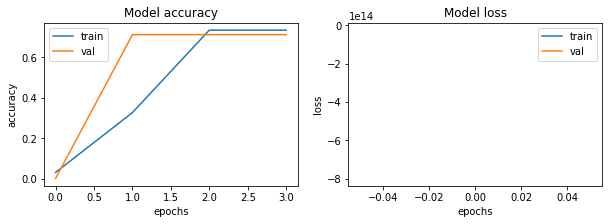

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## Прогнозирование

C:\Users\Har_Vit\AppData\Roaming\Python\Python37\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\Har_Vit\AppData\Roaming\Python\Python37\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\Har_Vit\AppData\Roaming\Python\Python37\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


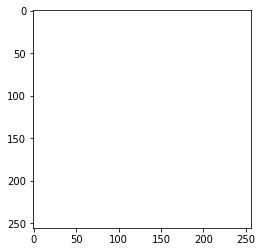

In [19]:
from keras.preprocessing import image
img_path = 'CHNCXR_0025_0.png'
img = image.load_img(img_path, target_size=(img_dims, img_dims))
pred = image.img_to_array(img)
pred = np.expand_dims(pred, axis=0)
pred = pred.astype('float32')/255

prediction = model.predict(pred)

plt.imshow(prediction[0])